In [2]:
import geopandas
import geopandas.tools as gts


In [3]:
# 宮崎県・鹿児島県・沖縄県はデータ上まとめられてるのでなし
prefs = [
    '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県',
    '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県',
    '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
    '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県',
    '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県',
    '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', 
    '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', 
    '熊本県', '大分県'
]


In [4]:
codes = gts.geocode(prefs, provider='nominatim', user_agent='test')
# GeoJSONを出力
#outpath = './prefs.geojson'
#codes.to_file(outpath, driver='GeoJSON', encoding='utf-8')


<AxesSubplot:>

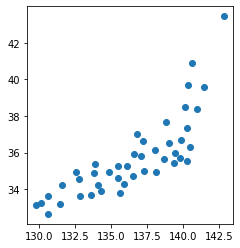

In [5]:
codes.plot()

In [13]:
pref = codes["address"][0]
# lon
lon = codes["geometry"][0].x
# lat
lat = codes["geometry"][0].y

f'{pref}の緯度経度: ({lon},{lat})'

'北海道, 日本の緯度経度: (142.8197834,43.4519831)'

In [64]:
codes['lon'] = codes['geometry'].map(lambda x: x.x)
codes['lat'] = codes['geometry'].map(lambda x: x.y)


In [77]:
import random
codes['rand'] = codes['geometry'].map(lambda x: random.randint(0, 10))

In [93]:
codes.head()

,geometry,address,lot,lat,lob,lon,rand
0,POINT (142.81978 43.45198),"北海道, 日本",142.819783,43.451983,142.819783,142.819783,2
1,POINT (140.59012 40.88694),"青森県, 日本",140.590121,40.886943,140.590121,140.590121,4
2,POINT (141.42536 39.57138),"岩手県, 日本",141.425357,39.571376,141.425357,141.425357,6
3,POINT (140.97610 38.38802),"宮城県, 日本",140.976102,38.388016,140.976102,140.976102,3
4,POINT (140.34261 39.68988),"秋田県, 日本",140.342608,39.689880,140.342608,140.342608,5


In [79]:
import json
geojson = json.loads(codes.to_json())

for feat in geojson['features']:
    prop = feat['properties']
    coor = feat["geometry"]["coordinates"]
    print(f"{prop['address']}: {coor}")\
    
    break

北海道, 日本: [142.8197834, 43.4519831]


In [111]:
import pydeck as pdk
from pydeck.types import String

# layer option https://deck.gl/docs/api-reference/aggregation-layers/heatmap-layer
layer = pdk.Layer(
    'HeatmapLayer', # 'HexagonLayer', # 'ScatterplotLayer', #'HeatmapLayer', 
    codes,
    get_position=['lon', 'lat'],
    #auto_highlight=True,
    get_radius=100,
    #get_fill_color='[180, 0, 200, 140]',
    pickable=True,
    opacity=0.7,
    radiusPixels=20,
    aggregation=String('MEAN'),
    get_weight="rand"
)

# 座標参考: https://www.gsi.go.jp/KOKUJYOHO/center.htm
view_state = pdk.ViewState(
    longitude=137.5936,
    latitude=36.047,
    zoom=5,
    min_zoom=1,
    max_zoom=15,
    pitch=50,
    bearing=-0
)

# Combined all of it and render a viewport
r = pdk.Deck(
    #map_style='mapbox://styles/mapbox/light-v9',
    layers=[layer], initial_view_state=view_state,
    #map_provider=None
)

r.to_html('example.html')

In [29]:
# https://deckgl.readthedocs.io/en/latest/layer.html#the-type-positional-argument
import pydeck as pdk

UK_ACCIDENTS_DATA = 'https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv'

layer = pdk.Layer(
    'HexagonLayer',  # `type` positional argument is here
    UK_ACCIDENTS_DATA,
    get_position=['lng', 'lat'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-1.415,
    latitude=52.2323,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Combined all of it and render a viewport
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('hexagon-example.html')